In [2]:
import pandas as pd

# Load the genetic variants dataset (example for ClinVar variant summary file)
file_path = 'variant_summary.txt'  # Adjust the path as needed
data = pd.read_csv(file_path, sep='\t', low_memory=False)

# Display the first few rows to understand the structure
print(data.head())

   #AlleleID                       Type  \
0      15041                      Indel   
1      15041                      Indel   
2      15042                   Deletion   
3      15042                   Deletion   
4      15043  single nucleotide variant   

                                                Name  GeneID GeneSymbol  \
0  NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...    9907      AP5Z1   
1  NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...    9907      AP5Z1   
2     NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs)    9907      AP5Z1   
3     NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs)    9907      AP5Z1   
4       NM_014630.3(ZNF592):c.3136G>A (p.Gly1046Arg)    9640     ZNF592   

      HGNC_ID    ClinicalSignificance  ClinSigSimple LastEvaluated  \
0  HGNC:22197              Pathogenic              1             -   
1  HGNC:22197              Pathogenic              1             -   
2  HGNC:22197              Pathogenic              1  Jun 29, 2010   
3  HGNC:22

In [3]:
print(data.columns)

Index(['#AlleleID', 'Type', 'Name', 'GeneID', 'GeneSymbol', 'HGNC_ID',
       'ClinicalSignificance', 'ClinSigSimple', 'LastEvaluated', 'RS# (dbSNP)',
       'nsv/esv (dbVar)', 'RCVaccession', 'PhenotypeIDS', 'PhenotypeList',
       'Origin', 'OriginSimple', 'Assembly', 'ChromosomeAccession',
       'Chromosome', 'Start', 'Stop', 'ReferenceAllele', 'AlternateAllele',
       'Cytogenetic', 'ReviewStatus', 'NumberSubmitters', 'Guidelines',
       'TestedInGTR', 'OtherIDs', 'SubmitterCategories', 'VariationID',
       'PositionVCF', 'ReferenceAlleleVCF', 'AlternateAlleleVCF',
       'SomaticClinicalImpact', 'SomaticClinicalImpactLastEvaluated',
       'ReviewStatusClinicalImpact', 'Oncogenicity',
       'OncogenicityLastEvaluated', 'ReviewStatusOncogenicity'],
      dtype='object')


In [4]:
# Adjust the list of relevant columns based on your dataset
relevant_columns = [
    'ClinicalSignificance',
    'GeneSymbol',
    'Chromosome',
    'Start',
    'ReferenceAllele',
    'AlternateAllele',
    'Type'  # Use 'Type' if 'MolecularConsequence' is not available
]

# Ensure all selected columns are present in the DataFrame
missing_columns = [col for col in relevant_columns if col not in data.columns]
if missing_columns:
    print(f"The following columns are missing in the dataset: {missing_columns}")
else:
    print("All relevant columns are present.")

# Select the relevant columns
df = data[relevant_columns].copy()

# Display the first few rows
print(df.head())


All relevant columns are present.
     ClinicalSignificance GeneSymbol Chromosome     Start ReferenceAllele  \
0              Pathogenic      AP5Z1          7   4820844              na   
1              Pathogenic      AP5Z1          7   4781213              na   
2              Pathogenic      AP5Z1          7   4827361              na   
3              Pathogenic      AP5Z1          7   4787730              na   
4  Uncertain significance     ZNF592         15  85342440              na   

  AlternateAllele                       Type  
0              na                      Indel  
1              na                      Indel  
2              na                   Deletion  
3              na                   Deletion  
4              na  single nucleotide variant  


# Data preprocessing

In [5]:
# Drop rows with missing values in selected columns
df.dropna(subset=relevant_columns, inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)


In [6]:
# Keep only 'Pathogenic' and 'Benign' classifications
df = df[df['ClinicalSignificance'].isin(['Pathogenic', 'Benign'])]

# Map target variable to binary labels
df['ClinicalSignificance'] = df['ClinicalSignificance'].map({'Benign': 0, 'Pathogenic': 1})

# Verify the mapping
print(df['ClinicalSignificance'].value_counts())


ClinicalSignificance
0    421746
1    355234
Name: count, dtype: int64


In [7]:
categorical_features = ['GeneSymbol', 'Chromosome', 'ReferenceAllele', 'AlternateAllele', 'Type']

for col in categorical_features:
    num_unique = df[col].nunique()
    print(f"Column '{col}' has {num_unique} unique values.")


Column 'GeneSymbol' has 18693 unique values.
Column 'Chromosome' has 27 unique values.
Column 'ReferenceAllele' has 14 unique values.
Column 'AlternateAllele' has 23 unique values.
Column 'Type' has 14 unique values.


In [9]:
%pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 802.2 kB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.0 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.0 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.0 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.0 MB 4.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.0 MB 3.9 MB/s eta 0:00:03
   ----- ------------------


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.preprocessing import OneHotEncoder

# Features to one-hot encode
one_hot_features = ['Chromosome', 'Type']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=one_hot_features)

# Display the new columns
print(df.columns)


Index(['ClinicalSignificance', 'GeneSymbol', 'Start', 'ReferenceAllele',
       'AlternateAllele', 'Chromosome_1', 'Chromosome_10', 'Chromosome_11',
       'Chromosome_12', 'Chromosome_13', 'Chromosome_14', 'Chromosome_15',
       'Chromosome_16', 'Chromosome_17', 'Chromosome_18', 'Chromosome_19',
       'Chromosome_2', 'Chromosome_20', 'Chromosome_21', 'Chromosome_22',
       'Chromosome_3', 'Chromosome_4', 'Chromosome_5', 'Chromosome_6',
       'Chromosome_7', 'Chromosome_8', 'Chromosome_9', 'Chromosome_MT',
       'Chromosome_Un', 'Chromosome_X', 'Chromosome_Y', 'Chromosome_na',
       'Type_Complex', 'Type_Deletion', 'Type_Duplication', 'Type_Indel',
       'Type_Insertion', 'Type_Inversion', 'Type_Microsatellite',
       'Type_Translocation', 'Type_Variation', 'Type_copy number gain',
       'Type_copy number loss', 'Type_fusion', 'Type_protein only',
       'Type_single nucleotide variant'],
      dtype='object')


In [12]:
%pip install category_encoders


   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   -------------- ------------------------- 30.7/82.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 82.0/82.0 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   --------------------- ------------------ 122.9/233.9 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 233.9/233.9 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB 7.7 MB/s eta 0:00:02
   - -------------------------------------- 0.3/9.8 MB 3.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/9.8 MB 4.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/9.8 MB 3.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.8 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.8 MB 4.0 MB/s eta 0:00:03
   ----- ---------


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import category_encoders as ce

# Features to target encode
high_cardinality_features = ['GeneSymbol', 'ReferenceAllele', 'AlternateAllele']

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=high_cardinality_features)

# Separate features and target variable
X = df.drop('ClinicalSignificance', axis=1)
y = df['ClinicalSignificance']

# Split the data to avoid data leakage
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit the encoder on training data
X_train = target_encoder.fit_transform(X_train, y_train)
# Transform the test data
X_test = target_encoder.transform(X_test)


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train['Start'] = scaler.fit_transform(X_train[['Start']])
X_test['Start'] = scaler.transform(X_test[['Start']])


In [15]:
# Verify that X_train and X_test have the same columns
missing_cols = set(X_train.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0
X_test = X_test[X_train.columns]


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


c:\Users\tejas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test)
)


Epoch 1/20
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 9s 845us/step - accuracy: 0.8005 - loss: 0.4333 - val_accuracy: 0.8034 - val_loss: 0.4275
Epoch 2/20
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 9s 883us/step - accuracy: 0.8071 - loss: 0.4197 - val_accuracy: 0.8036 - val_loss: 0.4253
Epoch 3/20
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8079 - loss: 0.4172 - val_accuracy: 0.8050 - val_loss: 0.4257
Epoch 4/20
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8085 - loss: 0.4158 - val_accuracy: 0.8035 - val_loss: 0.4304
Epoch 5/20
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8090 - loss: 0.4153 - val_accuracy: 0.8036 - val_loss: 0.4256
Epoch 6/20
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8083 - loss: 0.4155 - val_accuracy: 0.8039 - val_loss: 0.4246
Epoch 7/20
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8090 - loss: 0.4137 - val_accuracy: 0.8044 - val_loss: 0.4234
Epoch 8/20
9713/9713 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8093 - loss:

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


4857/4857 ━━━━━━━━━━━━━━━━━━━━ 2s 475us/step - accuracy: 0.8060 - loss: 0.4208
Test Accuracy: 80.41%


In [20]:
%pip install matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


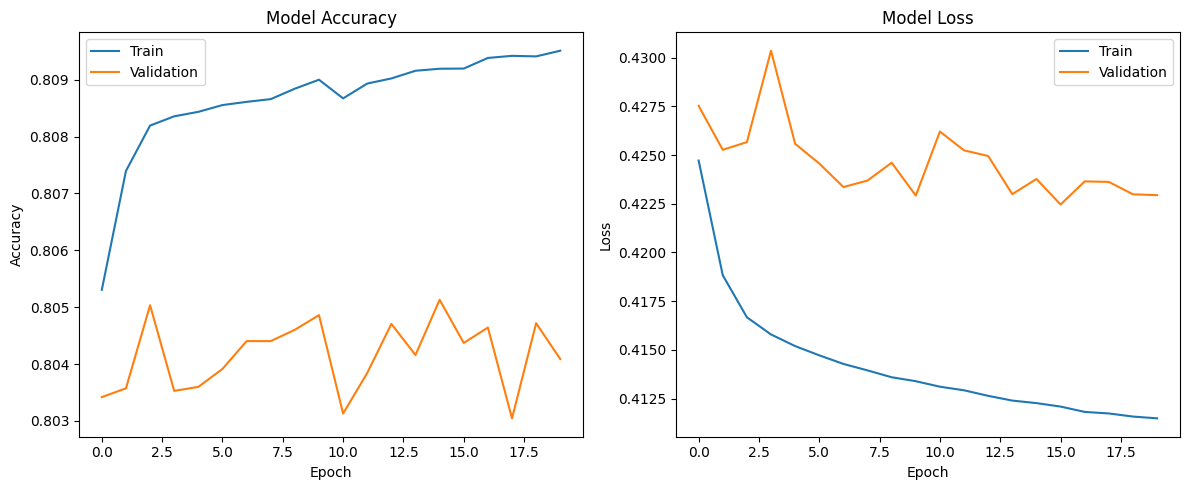

In [21]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)


4857/4857 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     84349
           1       0.79      0.78      0.78     71047

    accuracy                           0.80    155396
   macro avg       0.80      0.80      0.80    155396
weighted avg       0.80      0.80      0.80    155396

Confusion Matrix:
 [[69656 14693]
 [15751 55296]]


In [27]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.Collecting seaborn
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 667.8 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Heat map

4857/4857 ━━━━━━━━━━━━━━━━━━━━ 2s 436us/step


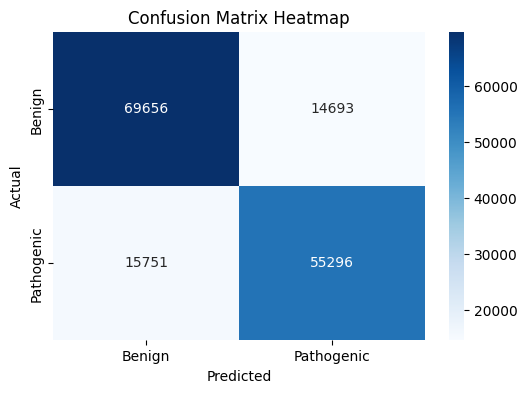

              precision    recall  f1-score   support

      Benign       0.82      0.83      0.82     84349
  Pathogenic       0.79      0.78      0.78     71047

    accuracy                           0.80    155396
   macro avg       0.80      0.80      0.80    155396
weighted avg       0.80      0.80      0.80    155396



In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assume model has been trained and X_test, y_test are defined
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels
labels = ['Benign', 'Pathogenic']

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=labels)
print(report)
